In [13]:
%pylab inline
import time
import seaborn as sns
import hdbscan
import sklearn.cluster as cluster
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 50, 'linewidths':0}

Populating the interactive namespace from numpy and matplotlib


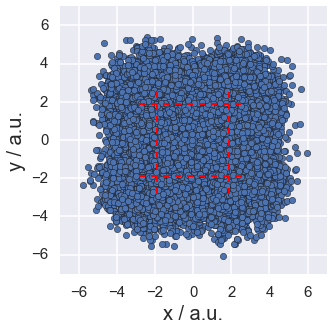

In [80]:
# generate the data points
npoints = 50000
mux = 1.9
muy = 1.9
points = np.zeros(shape=(npoints, 2), dtype=np.float64)
points[:, 0] = np.random.randn(npoints) + mux * (-1)**np.random.randint(0, high=2, size=npoints)
points[:, 1] = np.random.randn(npoints) + muy * (-1)**np.random.randint(0, high=2, size=npoints)
# draw the data points
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(points[:, 0], points[:, 1], s=40)
ax.plot([-mux, -mux], [-1.5 * muy, 1.5 * muy], '--', linewidth=2, color="red")
ax.plot([mux, mux], [-1.5 * muy, 1.5 * muy], '--', linewidth=2, color="red")
ax.plot([-1.5 * mux,  1.5 * mux], [-muy, -muy], '--', linewidth=2, color="red")
ax.plot([-1.5 * mux,  1.5 * mux], [muy, muy], '--', linewidth=2, color="red")
ax.set_xlabel(r"x / a.u.", fontsize=20)
ax.set_ylabel(r"y / a.u.", fontsize=20)
ax.tick_params(labelsize=15)
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])
ax.set_aspect('equal')
fig.tight_layout()

In [3]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    frame.axes.set_aspect('equal')
#     plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
#     plt.text(-2.5, 6.5, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

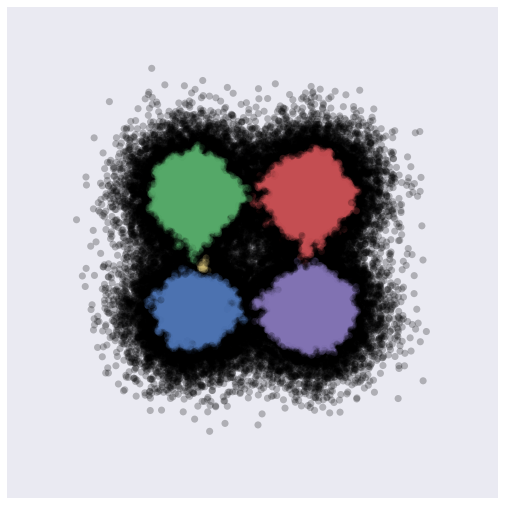

In [4]:
plot_clusters(points, hdbscan.HDBSCAN, (), {'min_cluster_size':60})

In [5]:
hdbcluster = hdbscan.HDBSCAN(min_cluster_size=60)
labels = hdbcluster.fit_predict(points)

In [39]:
hdbcluster.min_cluster_size=30
labels = hdbcluster.fit_predict(points)

In [6]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [12]:
from pydpc import Cluster

In [ ]:
%time clu = Cluster(points, fraction=0.02, autoplot=True)

In [ ]:
clu.assign(400, 3)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(points[:, 0], points[:, 1], s=40, alpha=0.3)
ax[0].scatter(points[clu.clusters, 0], points[clu.clusters, 1], s=50, c="red")
ax[1].scatter(points[:, 0], points[:, 1], s=40, c=clu.density, alpha=0.7)
ax[2].scatter(points[:, 0], points[:, 1], s=40, c=clu.membership, cmap=mpl.cm.cool, alpha=0.5)
for _ax in ax:
    _ax.plot([-mux, -mux], [-1.5 * muy, 1.5 * muy], '--', linewidth=2, color="red")
    _ax.plot([mux, mux], [-1.5 * muy, 1.5 * muy], '--', linewidth=2, color="red")
    _ax.plot([-1.5 * mux,  1.5 * mux], [-muy, -muy], '--', linewidth=2, color="red")
    _ax.plot([-1.5 * mux,  1.5 * mux], [muy, muy], '--', linewidth=2, color="red")
    _ax.set_xlabel(r"x / a.u.", fontsize=20)
    _ax.set_ylabel(r"y / a.u.", fontsize=20)
    _ax.tick_params(labelsize=15)
    _ax.set_xlim([-7, 7])
    _ax.set_ylim([-7, 7])
    _ax.set_aspect('equal')
fig.tight_layout()

In [ ]:
clu.distances


Demo of HDBSCAN clustering algorithm

Finds a clustering that has the greatest stability over a range
of epsilon values for standard DBSCAN. This allows clusterings
of different densities unlike DBSCAN.




++ HDBSCAN Results
Estimated number of clusters: 2
Elapsed time to cluster: 0.1500 s
Homogeneity: 0.543
Completeness: 0.877
V-measure: 0.670
Adjusted Rand Index: 0.552
Adjusted Mutual Information: 0.543
Silhouette Coefficient: 0.474


++ DBSCAN Results
Estimated number of clusters: 4
Elapsed time to cluster: 0.0970 s
Homogeneity: 0.574
Completeness: 0.801
V-measure: 0.669
Adjusted Rand Index: 0.555
Adjusted Mutual Information: 0.574
Silhouette Coefficient: 0.265


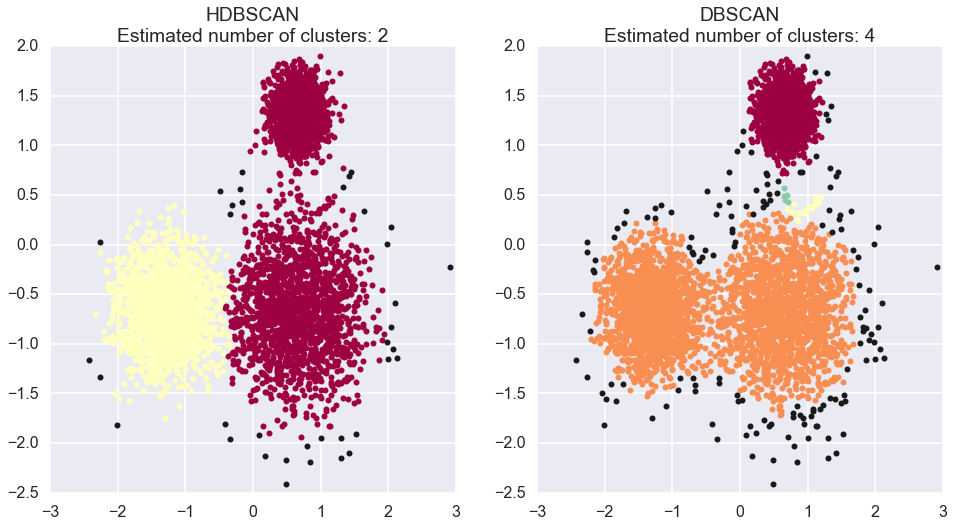

In [20]:
# -*- coding: utf-8 -*-
"""
===================================
Demo of HDBSCAN clustering algorithm
===================================

Finds a clustering that has the greatest stability over a range
of epsilon values for standard DBSCAN. This allows clusterings
of different densities unlike DBSCAN.

"""
print(__doc__)

import numpy as np

from hdbscan import HDBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

import time

def make_var_density_blobs(n_samples=750, centers=[[0,0]], cluster_std=[0.5], random_state=0):
    samples_per_blob = n_samples // len(centers)
    blobs = [make_blobs(n_samples=samples_per_blob, centers=[c], cluster_std=cluster_std[i])[0]
             for i, c in enumerate(centers)]
    labels = [i * np.ones(samples_per_blob) for i in range(len(centers))]
    return np.vstack(blobs), np.hstack(labels)


##############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
densities = [0.2, 0.35, 0.5]
X, labels_true = make_var_density_blobs(n_samples=5000, centers=centers, cluster_std=densities,
                            random_state=0)

X = StandardScaler().fit_transform(X)

##############################################################################
# Compute DBSCAN
hdb_t1 = time.time()
hdb = HDBSCAN(min_cluster_size=40).fit(X)
hdb_labels = hdb.labels_
hdb_elapsed_time = time.time() - hdb_t1

db_t1 = time.time()
db = DBSCAN(eps=0.1).fit(X)
db_labels = db.labels_
db_elapsed_time = time.time() - db_t1

# Number of clusters in labels, ignoring noise if present.
n_clusters_hdb_ = len(set(hdb_labels)) - (1 if -1 in hdb_labels else 0)

print('\n\n++ HDBSCAN Results')
print('Estimated number of clusters: %d' % n_clusters_hdb_)
print('Elapsed time to cluster: %.4f s' % hdb_elapsed_time)
print('Homogeneity: %0.3f' % metrics.homogeneity_score(labels_true, hdb_labels))
print('Completeness: %0.3f' % metrics.completeness_score(labels_true, hdb_labels))
print('V-measure: %0.3f' % metrics.v_measure_score(labels_true, hdb_labels))
print('Adjusted Rand Index: %0.3f'
      % metrics.adjusted_rand_score(labels_true, hdb_labels))
print('Adjusted Mutual Information: %0.3f'
      % metrics.adjusted_mutual_info_score(labels_true, hdb_labels))
print('Silhouette Coefficient: %0.3f'
      % metrics.silhouette_score(X, hdb_labels))

n_clusters_db_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)

print('\n\n++ DBSCAN Results')
print('Estimated number of clusters: %d' % n_clusters_db_)
print('Elapsed time to cluster: %.4f s' % db_elapsed_time)
print('Homogeneity: %0.3f' % metrics.homogeneity_score(labels_true, db_labels))
print('Completeness: %0.3f' % metrics.completeness_score(labels_true, db_labels))
print('V-measure: %0.3f' % metrics.v_measure_score(labels_true, db_labels))
print('Adjusted Rand Index: %0.3f'
      % metrics.adjusted_rand_score(labels_true, db_labels))
print('Adjusted Mutual Information: %0.3f'
      % metrics.adjusted_mutual_info_score(labels_true, db_labels))
if n_clusters_db_ > 1:
    print('Silhouette Coefficient: %0.3f'
          % metrics.silhouette_score(X, db_labels))
else:
    print('Silhouette Coefficient: NaN (too few clusters)')

##############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
hdb_unique_labels = set(hdb_labels)
db_unique_labels = set(db_labels)
hdb_colors = plt.cm.Spectral(np.linspace(0, 1, len(hdb_unique_labels)))
db_colors = plt.cm.Spectral(np.linspace(0, 1, len(db_unique_labels)))
fig = plt.figure(figsize=plt.figaspect(0.5))
hdb_axis = fig.add_subplot('121')
db_axis = fig.add_subplot('122')
for k, col in zip(hdb_unique_labels, hdb_colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    hdb_axis.plot(X[hdb_labels == k, 0], X[hdb_labels == k, 1], 'o', markerfacecolor=col,
                  markeredgecolor='k', markersize=6)
for k, col in zip(db_unique_labels, db_colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    db_axis.plot(X[db_labels == k, 0], X[db_labels == k, 1], 'o', markerfacecolor=col,
                  markeredgecolor='k', markersize=6)

hdb_axis.set_title('HDBSCAN\nEstimated number of clusters: %d' % n_clusters_hdb_)
db_axis.set_title('DBSCAN\nEstimated number of clusters: %d' % n_clusters_db_)
plt.show()


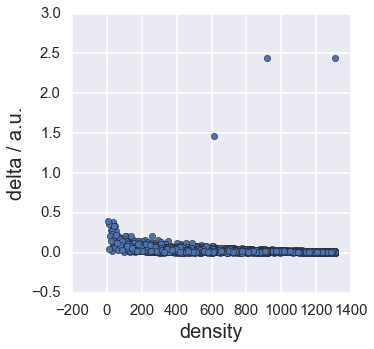

In [16]:
clu = Cluster(X, fraction=0.02, autoplot=True)

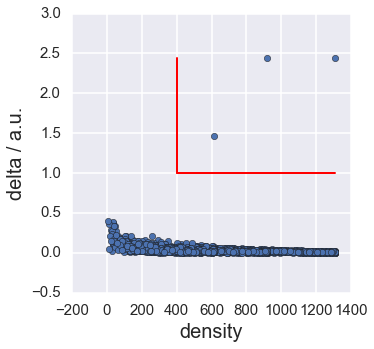

In [17]:
clu.assign(400, 1)

In [18]:
def view_dp_cluster(points):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].scatter(points[:, 0], points[:, 1], s=40, alpha=0.3)
    ax[0].scatter(points[clu.clusters, 0], points[clu.clusters, 1], s=50, c="red")
    ax[1].scatter(points[:, 0], points[:, 1], s=40, c=clu.density, alpha=0.7)
    ax[2].scatter(points[:, 0], points[:, 1], s=40, c=clu.membership, cmap=mpl.cm.cool, alpha=0.5)
    for _ax in ax:
        _ax.set_aspect('equal')
    fig.tight_layout()

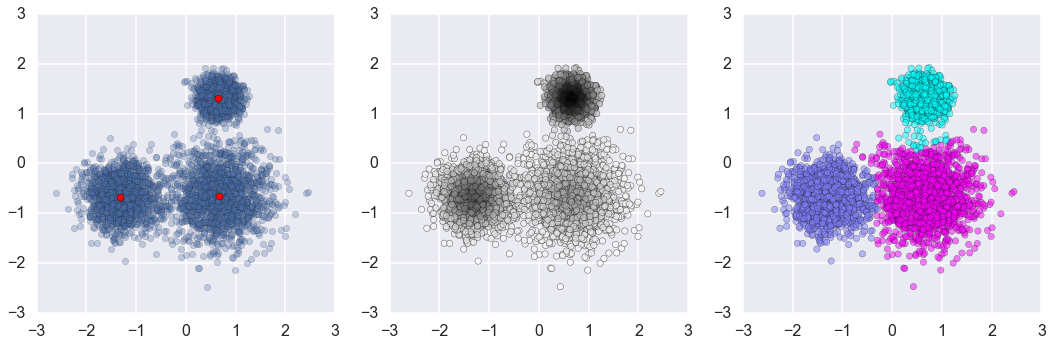

In [19]:
view_dp_cluster(X)

In [1]:
pwd

u'F:\\clustering\\pydpc-master\\ipython'

In [7]:
arr=np.loadtxt('./fig2_panelB.dat', dtype='float64')

In [8]:
arr.shape

(4000L, 2L)

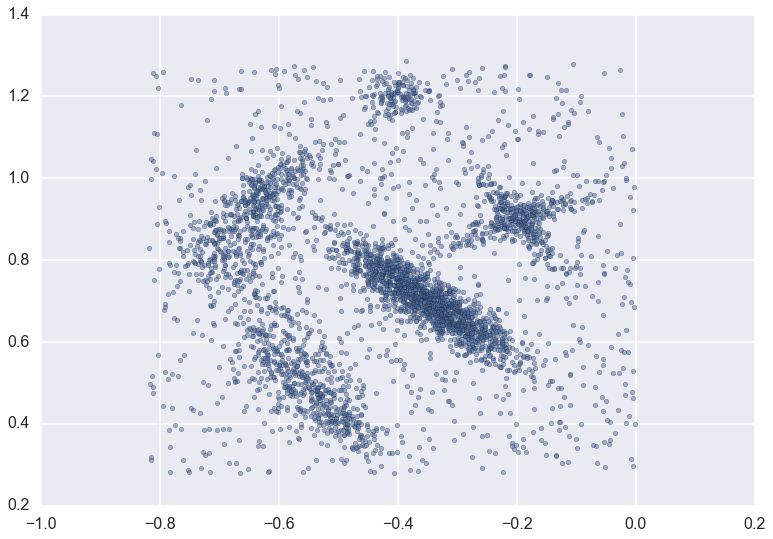

In [9]:
scatter(arr[:,0],arr[:,1], alpha=0.5)

In [14]:
from joblib import Memory
hdbcluster.min_cluster_size=311
hdbcluster.gen_min_span_tree = True
hdbcluster

NameError: name 'hdbcluster' is not defined

In [11]:
import cProfile
cProfile.run("labels = hdbcluster.fit_predict(arr)")
# hdbcluster.memory = Memory(cachedir='./tmp/joblib')

         2 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




NameError: name 'hdbcluster' is not defined

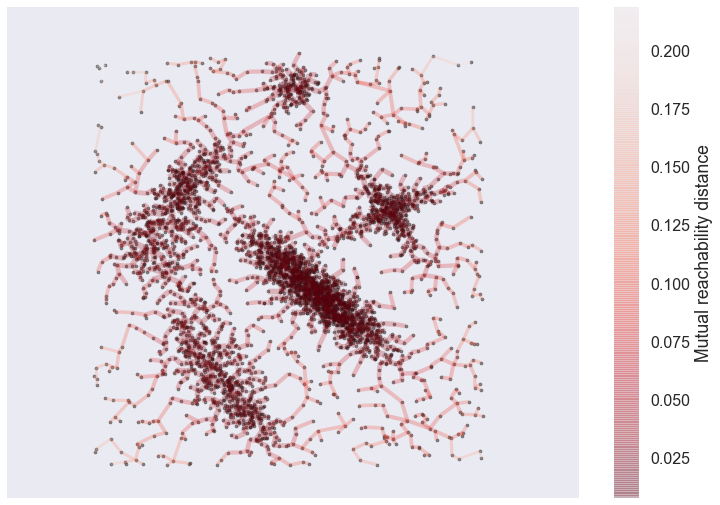

In [147]:
hdbcluster.minimum_spanning_tree_.plot()

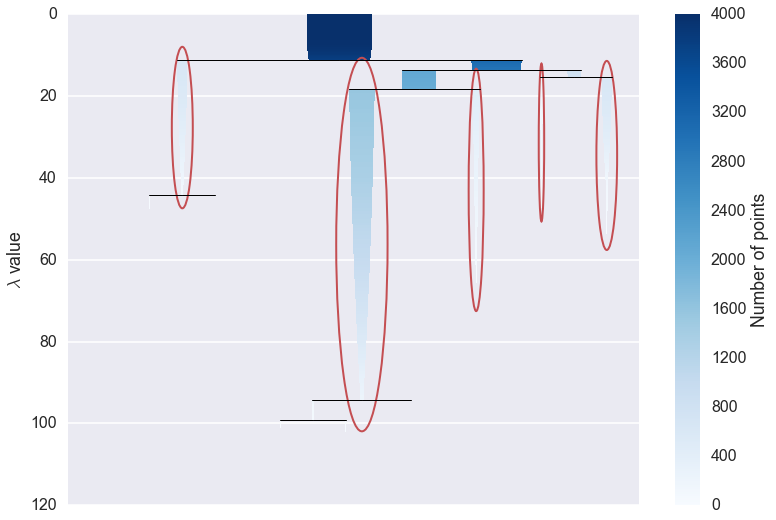

In [161]:
hdbcluster.condensed_tree_.plot(select_clusters=True)

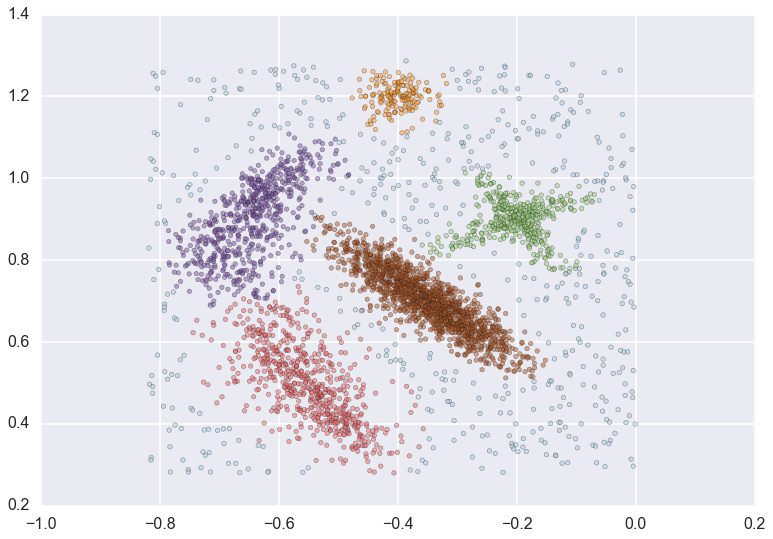

In [158]:
scatter(arr[:,0],arr[:,1], c=hdbcluster.labels_, cmap=mpl.cm.Paired, alpha=0.5)

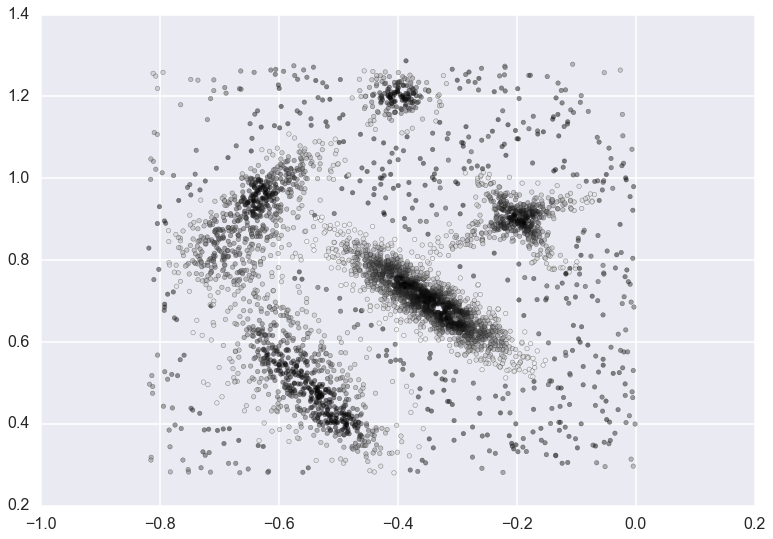

In [105]:
scatter(arr[:,0],arr[:,1], c=hdbcluster.outlier_scores_, cmap=mpl.cm.gray, alpha=0.5)

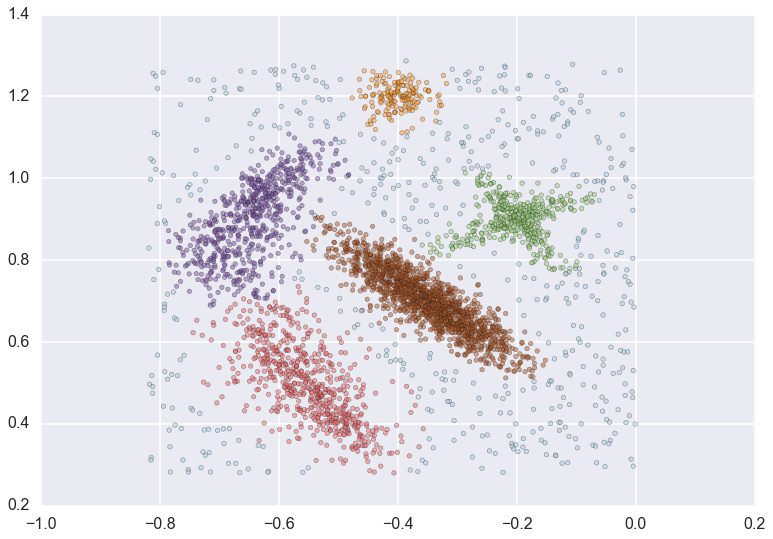

In [98]:
hdbcluster.min_cluster_size = 30
labels = hdbcluster.fit_predict(arr)
scatter(arr[:,0],arr[:,1], c=labels, cmap=mpl.cm.Paired, alpha=0.5)

In [86]:
hdbcluster

HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    memory=Memory(cachedir='./tmp/joblib\\joblib'), metric='euclidean',
    min_cluster_size=30, min_samples=None, p=None)

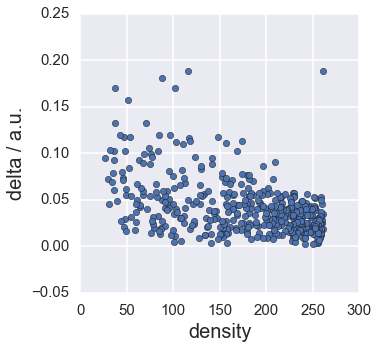

In [79]:
clu = Cluster(arr[labels==0]*7, fraction=0.02, autoplot=True)

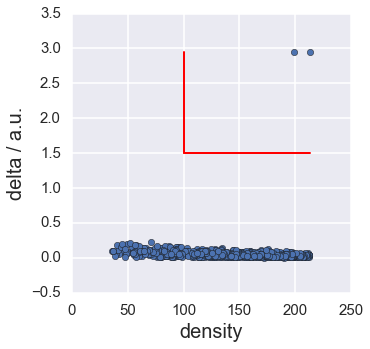

In [277]:
clu.assign(100,1.5)

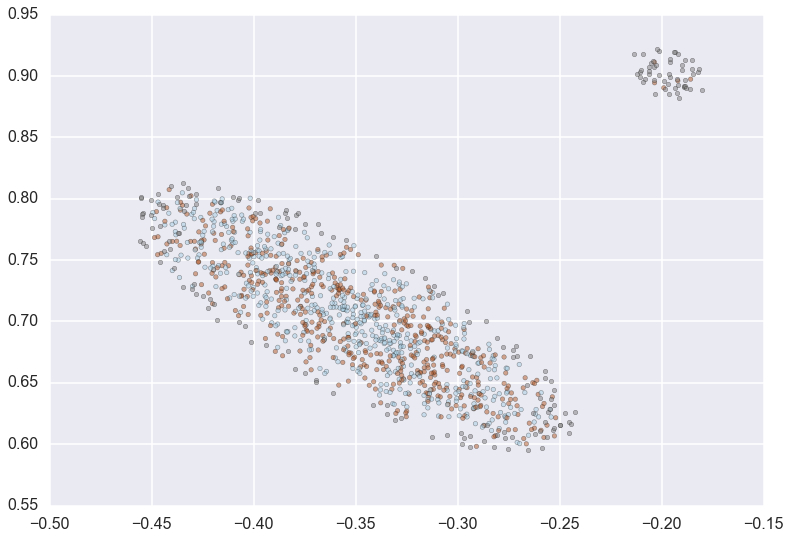

In [278]:
scatter(arr[clu.core_idx, 0], arr[clu.core_idx, 1], c=clu.membership[clu.core_idx], 
        cmap=mpl.cm.Paired, alpha=0.5)
scatter(arr[clu.halo_idx, 0], arr[clu.halo_idx, 1], c="grey", alpha=0.5)